<a href="https://colab.research.google.com/github/nishuchy/AI-works/blob/main/Deep_Learning_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Loading and Initial Exploration (EDA) **

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10


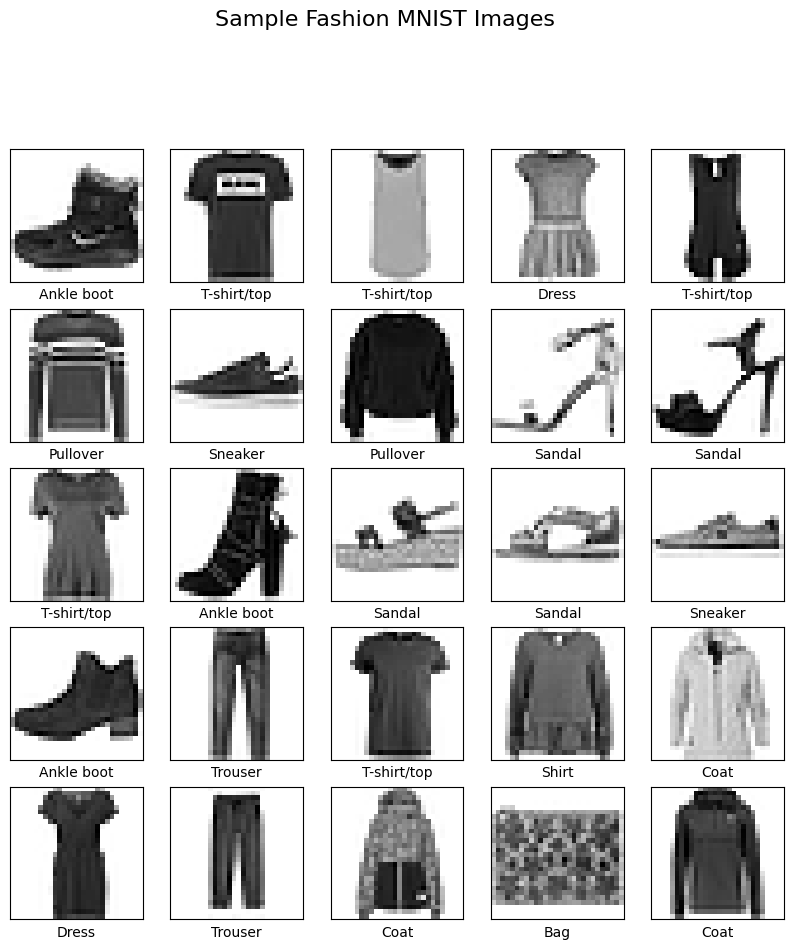


Train Label Distribution:
T-shirt/top: 6000 samples
Trouser: 6000 samples
Pullover: 6000 samples
Dress: 6000 samples
Coat: 6000 samples
Sandal: 6000 samples
Shirt: 6000 samples
Sneaker: 6000 samples
Bag: 6000 samples
Ankle boot: 6000 samples

Test Label Distribution:
T-shirt/top: 1000 samples
Trouser: 1000 samples
Pullover: 1000 samples
Dress: 1000 samples
Coat: 1000 samples
Sandal: 1000 samples
Shirt: 1000 samples
Sneaker: 1000 samples
Bag: 1000 samples
Ankle boot: 1000 samples

Min pixel value: 0
Max pixel value: 255


In [ ]:
# Google Colab Setup and Imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Define class names (for better readability)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display basic information about the dataset
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Number of classes: {len(np.unique(train_labels))}")

# Plot a few images to visualize the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle("Sample Fashion MNIST Images", y=1.02, fontsize=16)
plt.show()

# Display value counts for labels
print("\nTrain Label Distribution:")
unique_train_labels, counts_train_labels = np.unique(train_labels, return_counts=True)
for label, count in zip(unique_train_labels, counts_train_labels):
    print(f"{class_names[label]}: {count} samples")

print("\nTest Label Distribution:")
unique_test_labels, counts_test_labels = np.unique(test_labels, return_counts=True)
for label, count in zip(unique_test_labels, counts_test_labels):
    print(f"{class_names[label]}: {count} samples")

# Check pixel value range
print(f"\nMin pixel value: {train_images.min()}")
print(f"Max pixel value: {train_images.max()}")



 2. Data Cleaning, Preprocessing, Wrangling, and
Feature Engineering

In [ ]:
# --- Preprocessing for Deep Learning (CNN) ---
# Normalize pixel values to be between 0 and 1
train_images_cnn = train_images / 255.0
test_images_cnn = test_images / 255.0

# Reshape images to add a channel dimension (28, 28, 1) for CNN input
train_images_cnn = train_images_cnn.reshape((train_images_cnn.shape[0], 28, 28, 1))
test_images_cnn = test_images_cnn.reshape((test_images_cnn.shape[0], 28, 28, 1))

print(f"\nTrain images shape for CNN: {train_images_cnn.shape}")
print(f"Test images shape for CNN: {test_images_cnn.shape}")


# --- Preprocessing for Traditional Machine Learning ---
# Flatten the images to a 1D array (28*28 = 784 features)
train_images_flat = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images_flat = test_images.reshape(test_images.shape[0], -1) / 255.0

# Scale the flattened data (important for algorithms like SVM and Logistic Regression)
# Note: Standardization is applied after flattening and before ML model training.
# CNNs typically just need normalization (0-1).
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)
test_images_scaled = scaler.transform(test_images_flat)

print(f"Train images shape for Traditional ML (flattened): {train_images_flat.shape}")
print(f"Test images shape for Traditional ML (flattened): {test_images_flat.shape}")
print(f"Train images shape for Traditional ML (scaled): {train_images_scaled.shape}")
print(f"Test images shape for Traditional ML (scaled): {test_images_scaled.shape}")


Train images shape for CNN: (60000, 28, 28, 1)
Test images shape for CNN: (10000, 28, 28, 1)
Train images shape for Traditional ML (flattened): (60000, 784)
Test images shape for Traditional ML (flattened): (10000, 784)
Train images shape for Traditional ML (scaled): (60000, 784)
Test images shape for Traditional ML (scaled): (10000, 784)


3. Traditional Machine Learning Algorithms

In [ ]:
# --- Model 1: Logistic Regression ---
print("\n--- Training Logistic Regression ---")
log_reg_model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=200, n_jobs=-1, verbose=0)
log_reg_model.fit(train_images_scaled, train_labels)
print("Logistic Regression training complete.")

# --- Model 2: Random Forest Classifier ---
print("\n--- Training Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=0)
rf_model.fit(train_images_scaled, train_labels)
print("Random Forest Classifier training complete.")

# --- Model 3: Support Vector Machine (SVC) ---
print("\n--- Training Support Vector Machine (SVC) ---")
# SVC can be slow on large datasets; using a subset or linear kernel for speed in tutorial
# For better performance on full dataset, consider LinearSVC or more optimized kernels
# For a quick demonstration, we'll use a subset or accept longer training time.
# For this tutorial, we will use a small subset due to potential runtime on Colab's free tier.
# Or, keep full data and accept potential long runtime / resource issues.
# Given the size, using the full dataset might be too slow for general tutorial.
# Let's stick with the full dataset and hope for decent Colab resources.
# If it's too slow on full data, uncomment the subset creation below.
# subset_size = 10000
# X_train_subset, y_train_subset = train_images_scaled[:subset_size], train_labels[:subset_size]
# svm_model = SVC(kernel='rbf', random_state=42, verbose=False)
# svm_model.fit(X_train_subset, y_train_subset)
# print("SVC training complete on subset.")

# Let's try with the full dataset and see (can take 5-10+ minutes)
svm_model = SVC(kernel='rbf', random_state=42, verbose=False)
svm_model.fit(train_images_scaled, train_labels)
print("SVC training complete (full dataset).")


--- Training Logistic Regression ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression training complete.

--- Training Random Forest Classifier ---
Random Forest Classifier training complete.

--- Training Support Vector Machine (SVC) ---
SVC training complete (full dataset).


4. Deep Learning: Convolutional Neural Network (CNN)


--- Building and Training CNN ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6420 - loss: 0.9758 - val_accuracy: 0.8422 - val_loss: 0.4309
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8267 - loss: 0.4809 - val_accuracy: 0.8677 - val_loss: 0.3526
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8620 - loss: 0.3922 - val_accuracy: 0.8817 - val_loss: 0.3268
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8787 - loss: 0.3440 - val_accuracy: 0.8905 - val_loss: 0.2991
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8839 - loss: 0.3208 - val_accuracy: 0.8938 - val_loss: 0.2895
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8958 - loss: 0.2931 - val_accuracy: 0.8952 - val_loss: 0.2835
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9035 - loss: 0.2669 - val_accuracy: 0.8989 - val_loss: 0.2723
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9070 - loss: 0.2647 

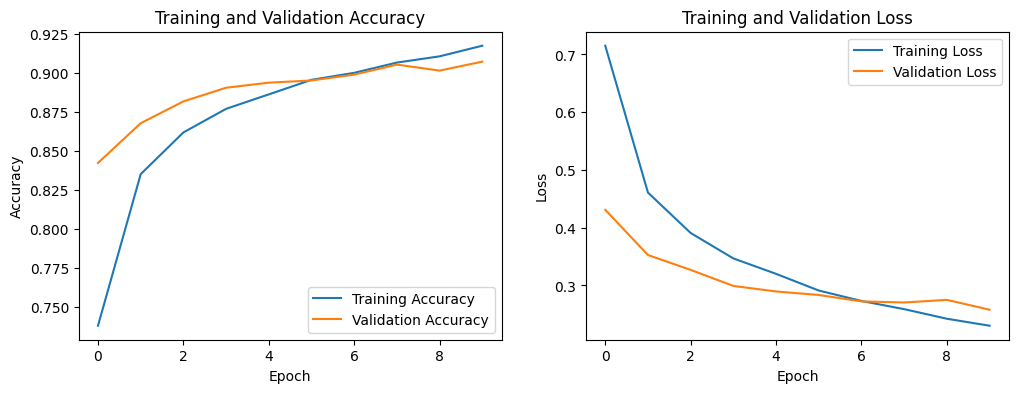

In [ ]:
# --- Model 4: Convolutional Neural Network (CNN) ---
print("\n--- Building and Training CNN ---")

# Define the CNN model architecture
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5), # Regularization to prevent overfitting
    keras.layers.Dense(10, activation='softmax') # 10 classes, softmax for probability distribution
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()
# Train the CNN model
# Using a validation split to monitor performance on unseen data during training
history = cnn_model.fit(train_images_cnn, train_labels, epochs=10,                         validation_split=0.2, verbose=1)

print("CNN training complete.")

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

 5. Performance Evaluation


--- Evaluating Traditional Machine Learning Models ---

--- Logistic Regression ---
Accuracy: 0.8452
Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.81      0.82      0.81      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.73      0.74      0.74      1000
       Dress       0.83      0.88      0.85      1000
        Coat       0.73      0.76      0.75      1000
      Sandal       0.94      0.92      0.93      1000
       Shirt       0.63      0.56      0.60      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.94      0.94      0.94      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



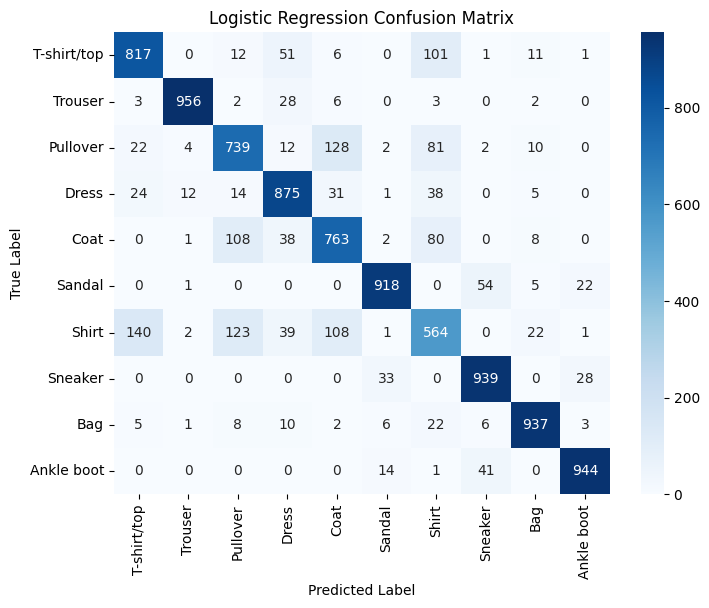


--- Random Forest ---
Accuracy: 0.8764
Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.77      0.82      0.79      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.58      0.64      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



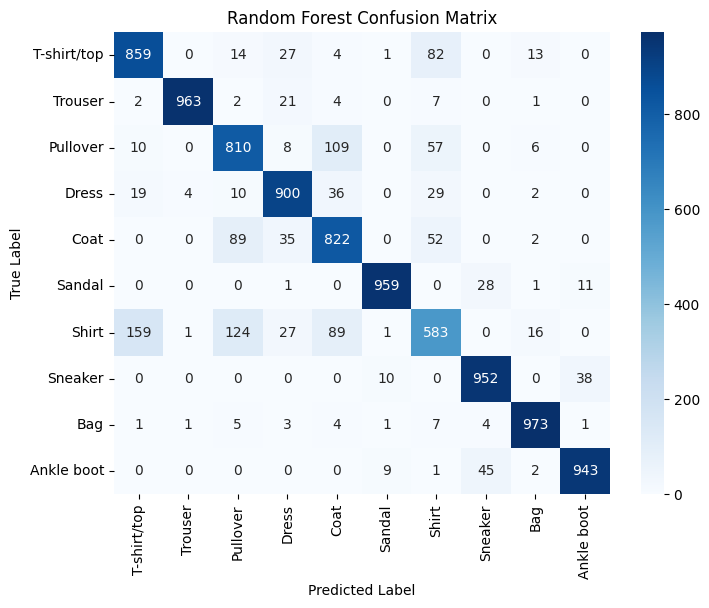


--- SVC ---
Accuracy: 0.8836
Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.80      0.81      0.81      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.80      0.82      0.81      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.72      0.65      0.68      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



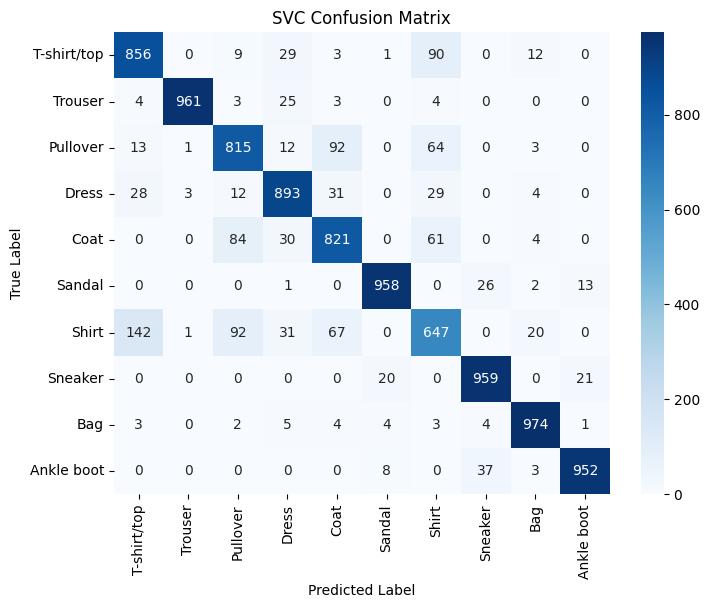


--- Evaluating Convolutional Neural Network (CNN) ---
CNN Test Loss: 0.2805
CNN Test Accuracy: 0.9074
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.80      0.92      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.84      0.86      1000
       Dress       0.93      0.90      0.92      1000
        Coat       0.84      0.89      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.66      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



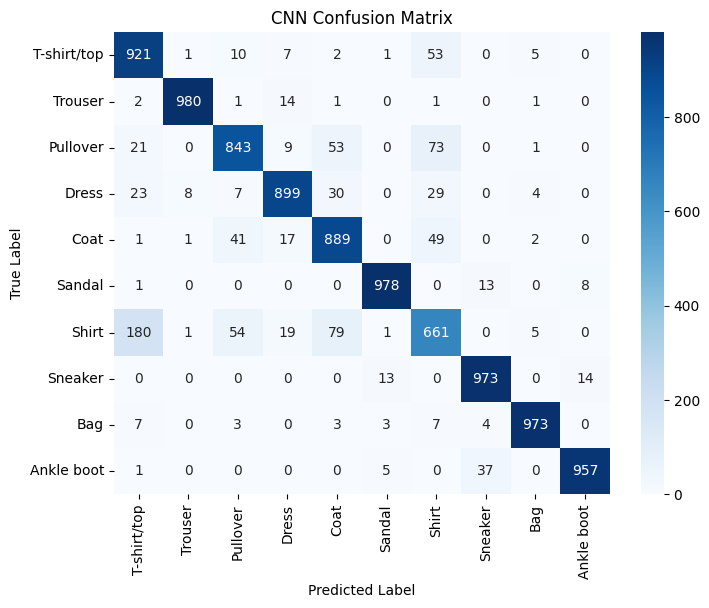


--- Summary of Model Performance (Test Accuracy) ---
Logistic Regression: 0.8452
Random Forest: 0.8764
SVC: 0.8836
CNN: 0.9074


In [ ]:
# --- Evaluate Traditional Models ---
print("\n--- Evaluating Traditional Machine Learning Models ---")

models = {
    "Logistic Regression": log_reg_model,
    "Random Forest": rf_model,
    "SVC": svm_model
}

results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")
    predictions = model.predict(test_images_scaled)
    accuracy = accuracy_score(test_labels, predictions)
    report = classification_report(test_labels, predictions, target_names=class_names,
zero_division=0)
    cm = confusion_matrix(test_labels, predictions)

    results[name] = {
        "accuracy": accuracy,
        "report": report,
        "confusion_matrix": cm
    }

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# --- Evaluate CNN Model ---
print("\n--- Evaluating Convolutional Neural Network (CNN) ---")
loss, accuracy = cnn_model.evaluate(test_images_cnn, test_labels, verbose=0)
print(f"CNN Test Loss: {loss:.4f}")
print(f"CNN Test Accuracy: {accuracy:.4f}")

# Get predictions and classification report for CNN
cnn_pred_probs = cnn_model.predict(test_images_cnn)
cnn_predictions = np.argmax(cnn_pred_probs, axis=1)

cnn_report = classification_report(test_labels, cnn_predictions, target_names=class_names,
zero_division=0)
cnn_cm = confusion_matrix(test_labels, cnn_predictions)

results["CNN"] = {
    "accuracy": accuracy,
    "report": cnn_report,
    "confusion_matrix": cnn_cm
}

print("CNN Classification Report:\n", cnn_report)

plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names,
yticklabels=class_names)
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Summary of All Models ---
print("\n--- Summary of Model Performance (Test Accuracy) ---")
for name, data in results.items():
    print(f"{name}: {data['accuracy']:.4f}")

 6. Prediction and Decision Making


--- Making Predictions on Sample Test Images ---

--- Sample 1 (True Label: Trouser) ---


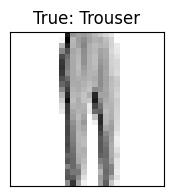

Logistic Regression Prediction: Trouser
Random Forest Prediction: Trouser
SVC Prediction: Trouser
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
CNN Prediction: Trouser (Confidence: 100.00%)
CNN Top 3 Probabilities: 
  - Trouser: 100.00%
  - Dress: 0.00%
  - Coat: 0.00%

--- Sample 2 (True Label: Sneaker) ---


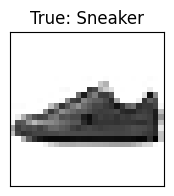

Logistic Regression Prediction: Sneaker
Random Forest Prediction: Sneaker
SVC Prediction: Sneaker
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
CNN Prediction: Sneaker (Confidence: 100.00%)
CNN Top 3 Probabilities: 
  - Sneaker: 100.00%
  - Sandal: 0.00%
  - Ankle boot: 0.00%

--- Sample 3 (True Label: Bag) ---


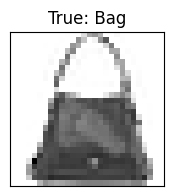

Logistic Regression Prediction: Bag
Random Forest Prediction: Bag
SVC Prediction: Bag
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
CNN Prediction: Bag (Confidence: 100.00%)
CNN Top 3 Probabilities: 
  - Bag: 100.00%
  - T-shirt/top: 0.00%
  - Shirt: 0.00%

--- Sample 4 (True Label: Trouser) ---


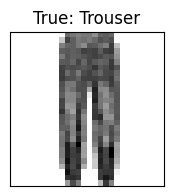

Logistic Regression Prediction: Trouser
Random Forest Prediction: Trouser
SVC Prediction: Trouser
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
CNN Prediction: Trouser (Confidence: 100.00%)
CNN Top 3 Probabilities: 
  - Trouser: 100.00%
  - Dress: 0.00%
  - Coat: 0.00%

--- Sample 5 (True Label: T-shirt/top) ---


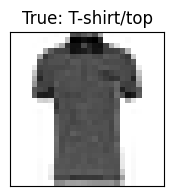

Logistic Regression Prediction: T-shirt/top
Random Forest Prediction: T-shirt/top
SVC Prediction: T-shirt/top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
CNN Prediction: T-shirt/top (Confidence: 99.71%)
CNN Top 3 Probabilities: 
  - T-shirt/top: 99.71%
  - Shirt: 0.29%
  - Pullover: 0.00%

--- Decision Making based on Model Performance ---
Choosing the 'best' model depends on your specific needs:

Based purely on test accuracy, the best model is: CNN (Accuracy: 0.9074)
The CNN achieved the highest accuracy, which is typical for image classification.
Decision: If maximum accuracy is the primary goal, and computational resources (for training and inference) are not a constraint, the CNN is likely the best choice.
Considerations: CNNs require more computational power and data for training. They are typically less interpretable than traditional models.

Further Considerations for Decision Making:
- **Computational Resources:** Training and deploying complex CNNs can be expensive.
- **Inference S

In [ ]:
# --- Making Predictions with Different Models ---

# Select a few random test images to make predictions on
num_predictions_to_show = 5
random_indices = np.random.choice(len(test_images), num_predictions_to_show, replace=False)

print("\n--- Making Predictions on Sample Test Images ---")

for i, idx in enumerate(random_indices):
    sample_image = test_images[idx]
    true_label = test_labels[idx]
    true_label_name = class_names[true_label]

    print(f"\n--- Sample {i+1} (True Label: {true_label_name}) ---")

    # Display the actual image
    plt.figure(figsize=(2,2))
    plt.imshow(sample_image, cmap=plt.cm.binary)
    plt.title(f"True: {true_label_name}")
    plt.xticks([])
    plt.yticks([])
    plt.show()

    # Prediction with Logistic Regression
    lr_pred_input = test_images_scaled[idx].reshape(1, -1)
    lr_prediction = log_reg_model.predict(lr_pred_input)[0]
    print(f"Logistic Regression Prediction: {class_names[lr_prediction]}")

    # Prediction with Random Forest
    rf_pred_input = test_images_scaled[idx].reshape(1, -1)
    rf_prediction = rf_model.predict(rf_pred_input)[0]
    print(f"Random Forest Prediction: {class_names[rf_prediction]}")

    # Prediction with SVC
    svm_pred_input = test_images_scaled[idx].reshape(1, -1)
    svm_prediction = svm_model.predict(svm_pred_input)[0]
    print(f"SVC Prediction: {class_names[svm_prediction]}")

    # Prediction with CNN
    cnn_pred_input = test_images_cnn[idx].reshape(1, 28, 28, 1) # Reshape for CNN
    cnn_pred_probs = cnn_model.predict(cnn_pred_input)[0]
    cnn_prediction = np.argmax(cnn_pred_probs)
    print(f"CNN Prediction: {class_names[cnn_prediction]} (Confidence: {np.max(cnn_pred_probs)*100:.2f}%)")
    print(f"CNN Top 3 Probabilities: ")
    top_3_indices = np.argsort(cnn_pred_probs)[::-1][:3]
    for k in top_3_indices:
        print(f"  - {class_names[k]}: {cnn_pred_probs[k]*100:.2f}%")

# --- Decision Making ---
print("\n--- Decision Making based on Model Performance ---")
print("Choosing the 'best' model depends on your specific needs:")

best_model_name = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBased purely on test accuracy, the best model is: {best_model_name} (Accuracy: {results[best_model_name]['accuracy']:.4f})")

if best_model_name == "CNN":
    print("The CNN achieved the highest accuracy, which is typical for image classification.")
    print("Decision: If maximum accuracy is the primary goal, and computational resources (for training and inference) are not a constraint, the CNN is likely the best choice.")
    print("Considerations: CNNs require more computational power and data for training. They are typically less interpretable than traditional models.")
elif best_model_name in ["Logistic Regression", "Random Forest", "SVC"]:
    print(f"A traditional ML model ({best_model_name}) achieved the highest or comparable accuracy.")
    print("Decision: If interpretability, faster training times, or lower computational demands are crucial, a traditional model might be preferred, especially if its performance is close to or even surpasses deep learning for your specific dataset.")
    print("Considerations: Random Forests are good for feature importance. Logistic Regression is simple and interpretable. SVC can be powerful but slower on large datasets.")

print("\nFurther Considerations for Decision Making:")
print("- **Computational Resources:** Training and deploying complex CNNs can be expensive.")
print("- **Inference Speed:** Real-time applications might prefer faster, simpler models if accuracy difference is negligible.")
print("- **Interpretability:** Why did the model make a specific prediction? Traditional models often provide more transparency.")
print("- **Data Size:** Deep learning models typically require vast amounts of data to reach their full potential.")
print("- **Deployment Environment:** What kind of hardware is available for running the model in production?")